In [8]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

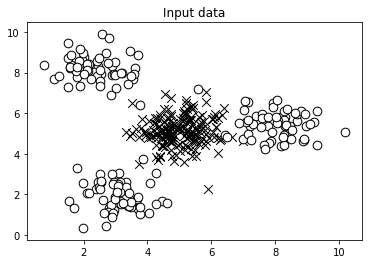

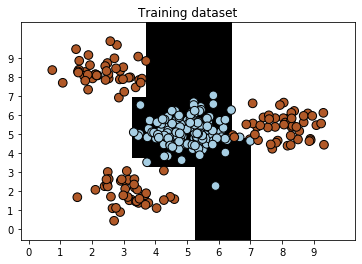

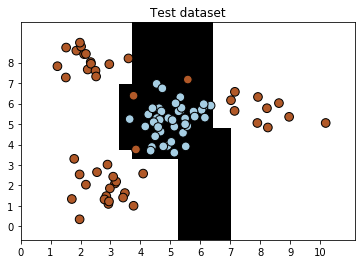


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
# from utilities import visualize_classifier

# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data using a scatter plot
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=5)

# Decision Trees classifier
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

# Compute the output of the classifier on the test dataset and visualize it:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()